In [2]:
import ugradio #if remote git clone this module
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

No module named 'rtlsdr'


# Load Data Acquired on 01/28/22 (fixed clipping issue via attenuator)

In [3]:
#Load Data
test_data = pd.read_csv('data_012822') #load dataframe


In [4]:
#experimentation cell

titles = test_data.columns[1:7] #datatype is a pandas index with string values; can pull strings by indexing
times = np.array(range(len(test_data.loc[:, f'{titles[0]}']))) #initialize arbitrary numpy array to make up x-axis for plot
#r'Power Spectrum $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$'
#times = range(len(test_data.loc[:, f'{titles[0]}']))
titles

Index(['data_230', 'data_250', 'data_300', 'data_1000', 'data_1600',
       'data_2200'],
      dtype='object')

In [5]:
def volt_spec(sample):
    data = test_data[sample]
    fourier = ugradio.dft.dft(data)
    return fourier

def power_spec(sample): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec(sample)
    return volt[0], abs(volt[1])**2 #returns power spectrum of specified frequencies

# Waveforms in time space

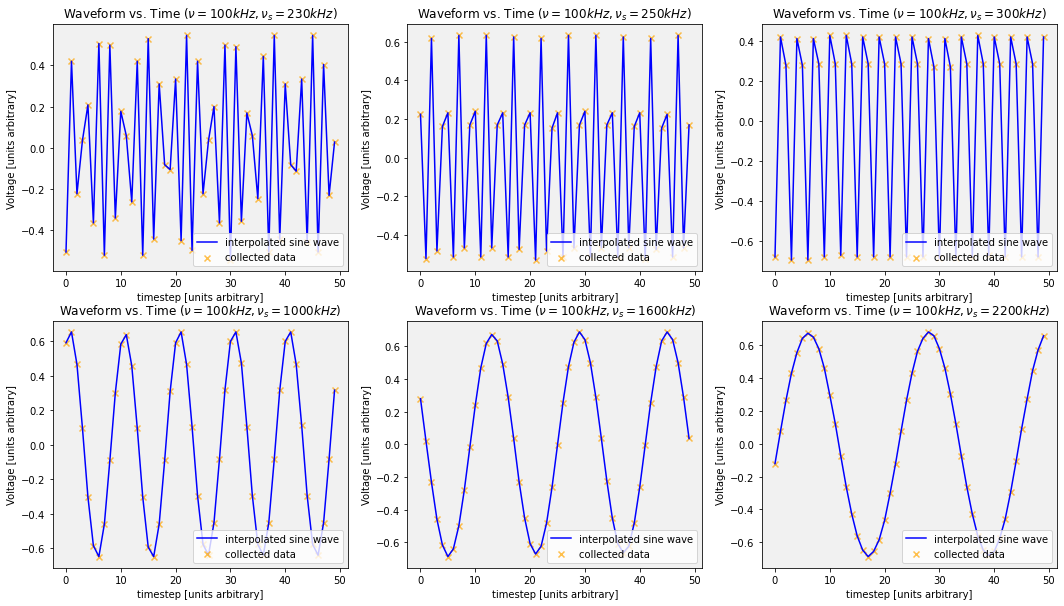

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Power Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Waveform vs. Time $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$')
        hax.plot(times[:50], test_data.loc[:, f'{titles[k]}'][:50], color = 'blue', label='interpolated sine wave')
        hax.scatter(times[:50], test_data.loc[:, f'{titles[k]}'][:50], color = 'orange', marker = 'x', alpha = 0.7, label='collected data')
        #used blue-orange color scheme out of color-blindness considerations^
        hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('timestep [units arbitrary]')
        hax.set_ylabel(r'Voltage [units arbitrary]')
        hax.legend(loc = 4, )

# Power Spectra

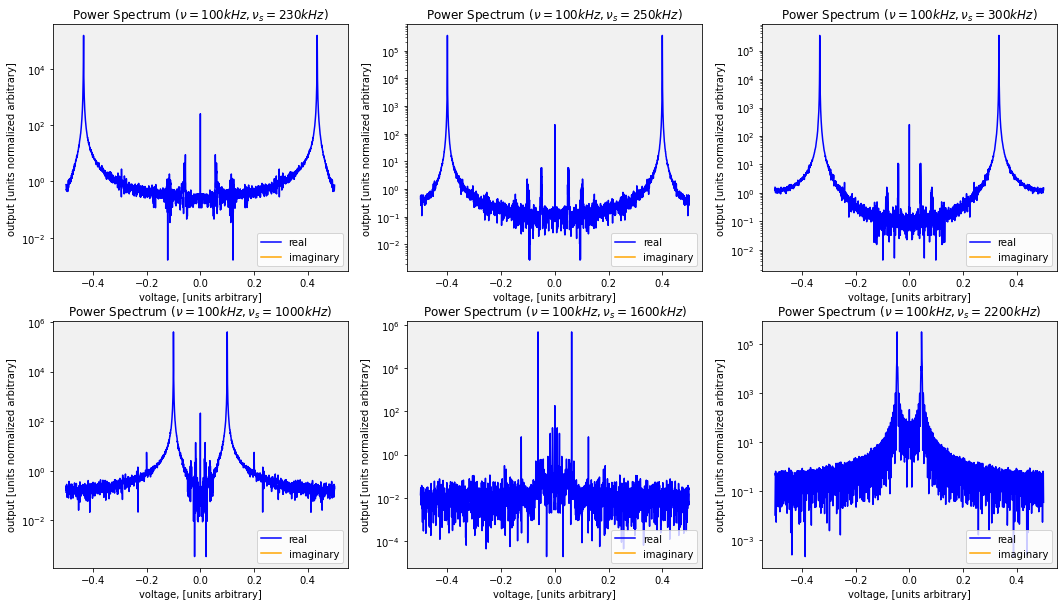

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Power Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Power Spectrum $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$')
        hax.plot(power_spec(f'{titles[k]}')[0], power_spec(f'{titles[k]}')[1].real, color = 'blue', label='real')
        hax.plot(power_spec(f'{titles[k]}')[0], power_spec(f'{titles[k]}')[1].imag, color = 'orange', label='imaginary')
        #used blue-orange color scheme out of color-blindness considerations^
        hax.set_yscale('log') #comment this line out for linear scale
        hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('voltage, [units arbitrary]')
        hax.set_ylabel(r'output [units normalized arbitrary]')
        hax.legend(loc = 4, )

# Voltage Spectra

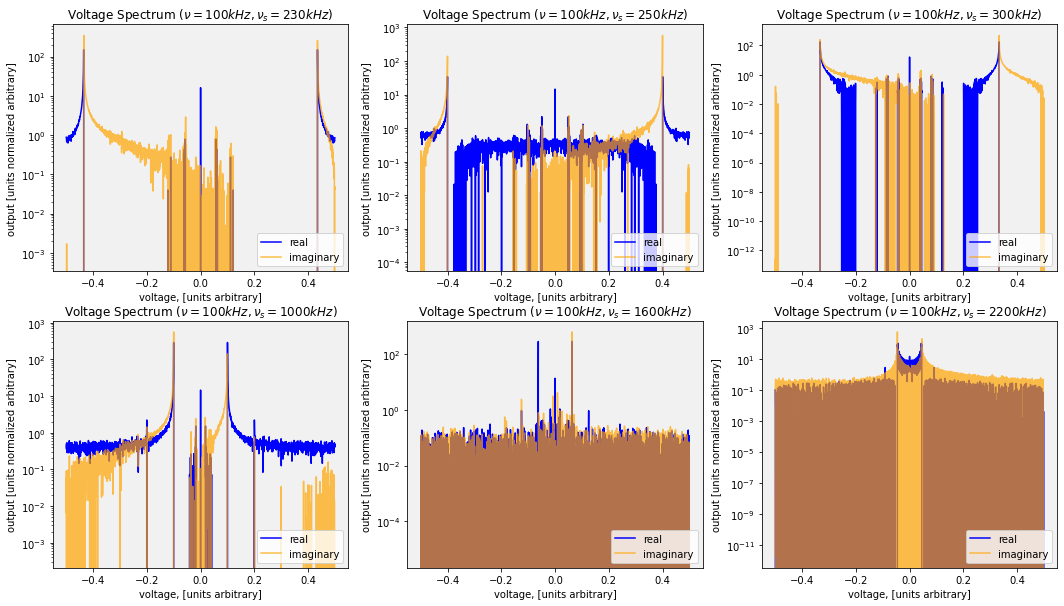

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), squeeze=True, facecolor = 'white')
plt.title('Voltage Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Voltage Spectrum $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$')
        hax.plot(volt_spec(f'{titles[k]}')[0], volt_spec(f'{titles[k]}')[1].real, color = 'blue', label='real')
        hax.plot(volt_spec(f'{titles[k]}')[0], volt_spec(f'{titles[k]}')[1].imag, color = 'orange', alpha = 0.7, label='imaginary')
        #used blue-orange color scheme out of color-blindness considerations^
        hax.set_yscale('log') #comment this line out for linear scale
        hax.set_facecolor('#f1f1f1')
        hax.set_xlabel('voltage, [units arbitrary]')
        hax.set_ylabel(r'output [units normalized arbitrary]')
        hax.legend(loc = 4, )

## Boilerplate Example from Cole's Original Notebook

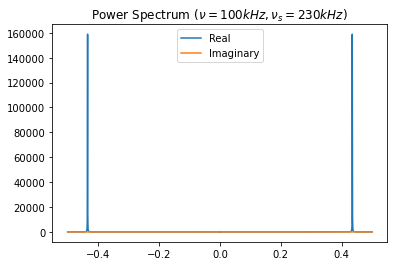

In [53]:
power_100_230 = power_spec(f'{titles[0]}')
plt.figure()
plt.title(r'Power Spectrum $(\nu = 100 kHz, \nu_s = 230 kHz)$')
plt.plot(power_100_230[0], power_100_230[1].real, label = 'Real')
plt.plot(power_100_230[0], power_100_230[1].imag, label = 'Imaginary')
plt.legend()